# Part 4 - Modeling

In [1]:
# Load packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset

df = pd.read_csv('Part_3.csv')
pd.set_option("display.max_columns", None)
display(df.head())

loan_status  loan_amnt  term  int_rate  installment  emp_length  \
0            1     5000.0    36     10.65       162.87        10.0   
1            0     2500.0    60     15.27        59.83         0.0   
2            1     2400.0    36     15.96        84.33        10.0   
3            1    10000.0    36     13.49       339.31        10.0   
4            1     3000.0    60     12.69        67.79         1.0   

   annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0     24000.0  27.65          0.0             1.0       3.0      0.0   
1     30000.0   1.00          0.0             5.0       3.0      0.0   
2     12252.0   8.72          0.0             2.0       2.0      0.0   
3     49200.0  20.00          0.0             1.0      10.0      0.0   
4     80000.0  17.94          0.0             0.0      15.0      0.0   

   revol_bal  revol_util  total_acc  pub_rec_bankruptcies  fico_score  \
0    13648.0        83.7       76.0                   0.0         737   
1     1687.0         9.4       76.0                   0.0         742   
2     2956.0        98.5       76.0                   0.0         737   
3     5598.0        21.0       76.0                   0.0         692   
4    27783.0        53.9       76.0                   0.0         697   

   fico_class  sub_grade_A1  sub_grade_A2  sub_grade_A3  sub_grade_A4  \
0           3             0             0             0             0   
1           4             0             0             0             0   
2           3             0             0             0             0   
3           3             0             0             0             0   
4           3             0             0             0             0   

   sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  \
0             0             0             1             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_B5  sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             1             0             0             0             0   

   sub_grade_C5  sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             1             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_D5  sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_E5  sub_grade_F1  sub_grade_F2  sub_grade_F3  sub_grade_F4  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_F5 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Columns: 130 entries, loan_status to addr_state_WY
dtypes: float64(14), int64(116)
memory usage: 39.5 MB


In [4]:
# Checking nulls

round(100*(df.isnull().sum()/len(df.index)), 2).value_counts()

0.0    130
dtype: int64

In [5]:
print(df.columns.tolist())

['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score', 'fico_class', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verif_stat', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolid

In [6]:
df.shape

(39786, 130)

In [7]:
# Copy of the Data Frame (one of them will be used for clustering)

df_copy = df

In [8]:
# Data Frames shape after deleting outliers

df_copy.shape

(39786, 130)

### Clustering: KMeans
#### Justifying methods: Silhouette score, Elbow-curve method

In [9]:
# Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_copy)

KMeans(n_clusters=5)

In [11]:
kmeans.labels_

array([4, 4, 4, ..., 0, 2, 4])

In [12]:
# Silhouette score

range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(df_copy)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_copy, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9383776091798457
For n_clusters=3, the silhouette score is 0.6372241184743188
For n_clusters=4, the silhouette score is 0.5779774664460495
For n_clusters=5, the silhouette score is 0.4898205782810134


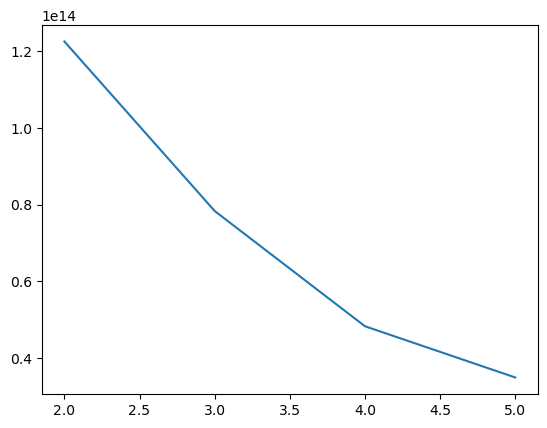

In [13]:
# Elbow-curve method

ssd = [] # Sum of squared distances
range_n_clusters = [2, 3, 4, 5]
for num_clusters in (range_n_clusters):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(df_copy)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)

In [14]:
# n_clusters = 4

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_copy)

KMeans(n_clusters=4, random_state=42)

In [15]:
kmeans.labels_

array([1, 1, 1, ..., 3, 3, 1])

In [16]:
df_copy['K-Means_Cluster_ID'] = kmeans.labels_

In [17]:
df_copy['K-Means_Cluster_ID'].value_counts()

1    31947
3     7755
0       82
2        2
Name: K-Means_Cluster_ID, dtype: int64

In [18]:
df_copy.groupby('K-Means_Cluster_ID')['loan_status'].value_counts()

K-Means_Cluster_ID  loan_status
0                   1                 70
                    0                 12
1                   1              27127
                    0               4820
2                   1                  2
3                   1               6917
                    0                838
Name: loan_status, dtype: int64

In [19]:
df_copy.groupby('K-Means_Cluster_ID')['loan_amnt'].describe()

count          mean           std     min      25%  \
K-Means_Cluster_ID                                                         
0                      82.0  15767.987805  10350.189563  1000.0   6525.0   
1                   31947.0  10020.813378   6534.651947   500.0   5000.0   
2                       2.0  15000.000000  14142.135624  5000.0  10000.0   
3                    7755.0  16169.310123   8841.499179  1000.0   9000.0   

                        50%      75%      max  
K-Means_Cluster_ID                             
0                   14500.0  25000.0  35000.0  
1                    8500.0  13750.0  35000.0  
2                   15000.0  20000.0  25000.0  
3                   15000.0  24000.0  35000.0

In [20]:
# n_clusters = 2

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_copy)

KMeans(n_clusters=2, random_state=42)

In [21]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
df_copy['K-Means_Cluster_ID'] = kmeans.labels_

In [23]:
df_copy['K-Means_Cluster_ID'].value_counts()

0    39706
1       80
Name: K-Means_Cluster_ID, dtype: int64

In [24]:
df_copy.groupby('K-Means_Cluster_ID')['loan_status'].value_counts()

K-Means_Cluster_ID  loan_status
0                   1              34048
                    0               5658
1                   1                 68
                    0                 12
Name: loan_status, dtype: int64

In [25]:
df_copy.groupby('K-Means_Cluster_ID')['loan_amnt'].describe()

count          mean           std     min     25%  \
K-Means_Cluster_ID                                                        
0                   39706.0  11222.873747   7455.903201   500.0  5500.0   
1                      80.0  15443.437500  10159.253081  1000.0  6475.0   

                        50%      75%      max  
K-Means_Cluster_ID                             
0                   10000.0  15000.0  35000.0  
1                   13012.5  25000.0  35000.0

Regardless of the separation of 2 or 4 clusters (according to Silhouette score and Elbow-curve, there is no clear division into the loan_status columns: Fully Paid and Charged Off. Most selected clusters are poorly separated.

In [26]:
# Dropping an additional column after clustering.

df = df.drop('K-Means_Cluster_ID', axis=1)

## Training models

In [ ]:
df.loan_status.value_counts()

In [ ]:
# Loading train_test_split

from sklearn.model_selection import train_test_split

In [ ]:
# Spliting data into X and y and checking the shape

X = df.drop('loan_status', axis=1)
y = df['loan_status'].values

print(X.shape)
print(y.shape)

In [ ]:
# Data splitting into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Checking the size of the data split

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Importing metrics and classification report

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
# Function using to create a classification reports

def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True, zero_division=1)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
dt_prediction = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test, dt_prediction, zero_division=1))

dtree_pr= evaluate(dt_prediction,y_test)
dtree_pr

In [ ]:
# Calculating the number of predicted 0s and 1s

dtree_count = np.unique(dt_prediction, return_counts=True)
dtree_count

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

In [ ]:
rf_prediction = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, rf_prediction, zero_division=1))
rf_pr = evaluate(rf_prediction,y_test)
print(rf_pr)

In [ ]:
rf_count = np.unique(rf_prediction, return_counts=True)
rf_count

In [ ]:
# Data standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('loan_status',axis=1))
scaled_data = scaler.transform(df.drop('loan_status' ,axis=1))
df_scaled = pd.DataFrame(scaled_data,columns=df.drop('loan_status',axis=1).columns)
df_scaled.head()

In [ ]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(scaled_data, df['loan_status'],
                                                    test_size=0.30, random_state = 42)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_scaled_train, y_scaled_train)

In [ ]:
lr_prediction = lr.predict(X_scaled_test)

In [ ]:
print(classification_report(y_scaled_test, lr_prediction, zero_division=1))
lr_pr = evaluate(lr_prediction,y_scaled_test)
print(lr_pr)

In [ ]:
lr_count = np.unique(lr_prediction, return_counts=True)
lr_count

### Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_scaled_train, y_scaled_train)

In [ ]:
nb_prediction = nb.predict(X_scaled_test)

In [ ]:
print(classification_report(y_scaled_test, nb_prediction, zero_division=1))
nb_pr = evaluate(nb_prediction,y_scaled_test)
print(nb_pr)

In [ ]:
nb_count = np.unique(nb_prediction, return_counts=True)
nb_count

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X_scaled_train, y_scaled_train)

In [ ]:
svm_prediction = model.predict(X_scaled_test)

In [ ]:
print(classification_report(y_scaled_test, svm_prediction, zero_division=1))
svm_pr = evaluate(svm_prediction,y_scaled_test)
svm_pr

In [ ]:
svm_count = np.unique(svm_prediction, return_counts=True)
svm_count

### K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(X_scaled_train,y_scaled_train)

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
knn_prediction = knn.predict(X_scaled_test)

In [ ]:
print(classification_report(knn_prediction, y_scaled_test, zero_division=1))
knn_pr = evaluate(knn_prediction,y_scaled_test)
knn_pr

In [ ]:
knn_count = np.unique(knn_prediction, return_counts=True)
knn_count

In [ ]:
prediction_data={'Model': ['Decision Tree',
                          'Random Forest',
                          'Logistic Regression',
                          'Naive Bayes',
                          'SVM',
                          'KNN'
                         ],
                   'F1-score': [dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              lr_pr['f1-score'],
                              nb_pr['f1-score'],
                              svm_pr['f1-score'],
                              knn_pr['f1-score']],
                 
                   'Accuracy': [dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              lr_pr['accuracy'],
                              nb_pr['accuracy'],
                              svm_pr['accuracy'],
                              knn_pr['accuracy']],
                 
                    }
 
# Create DataFrame
prediction_table = pd.DataFrame(prediction_data)
prediction_table

In [ ]:
prediction_counts = {'Model': ['Decision Tree',
                              'Random Forest',
                              'Logistic Regression',
                              'Naive Bayes',
                              'SVM',
                              'KNN'
                              ],
                     
                    'Balnce [0 : 1]': [dtree_count[1],
                              rf_count[1],
                              lr_count[1],
                              nb_count[1],
                              svm_count[1],
                              knn_count[1]]
                    }

counts_table = pd.DataFrame(prediction_counts)
counts_table

The three models: Random Forest, Logistic Regression and SVM have the same high accuracy and f1_score but the answers are unbalanced (no negative answers for SVM and only a few negative answers for Random Forest and Logistic Regression). The models: Decision Tree Classifier, Naive Bayes and K Nearest Neighbors are characterized by better balanced data.

## Data compression by PCA

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled[:4, :4]

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

In [ ]:
# Heatmap

plt.figure(figsize = (20,10))
sns.heatmap(X_scaled_df.corr(), annot=True)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_scaled)

In [ ]:
pca.components_[0]

In [ ]:
# Percentage of variance explained by each of the selected components.

pca.explained_variance_ratio_

In [ ]:
# Cumulative sum of elements

var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

In [ ]:
# Ploting the best number of PCA components

fig = plt.figure(figsize=[12,8], dpi=200)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26])
plt.vlines(x=18, ymax=1, ymin=0, colors='r', linestyles='--')
plt.hlines(y=0.95, xmax = 27, xmin=0, colors='g', linestyles='--')
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
# Data compression to 18 variables

pca_final = PCA(n_components=18)
X_pca_final = pca_final.fit_transform(X_scaled) 

In [ ]:
print(X.shape)
print(X_pca_final.shape)

In [ ]:
corrmat = np.corrcoef(X_pca_final.transpose())
corrmat.shape

In [ ]:
# Heatmap after PCA

plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

In [ ]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1': pca.components_[0], 'PC2': pca.components_[1], 'PC3': pca.components_[2], 
                       'PC4': pca.components_[3], 'PC5': pca.components_[4], 'PC6': pca.components_[5], 
                       'PC7': pca.components_[6], 'PC8': pca.components_[7], 'PC9': pca.components_[8],
                       'PC10': pca.components_[9], 'PC11': pca.components_[10], 'PC12': pca.components_[11],
                       'PC13': pca.components_[12], 'PC14': pca.components_[13], 'PC15': pca.components_[14],
                       'PC16': pca.components_[15], 'PC17': pca.components_[16], 'PC18': pca.components_[17],
                       'Features': colnames})
pca_df

In [ ]:
pca_df.shape

## Training models after PCA

In [ ]:
X = X_pca_final
y = df.loan_status

print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Decision Tree

In [ ]:
dtree_pca = DecisionTreeClassifier()
dtree_pca.fit(X_train, y_train)

In [ ]:
dtree_pca_pred = dtree_pca.predict(X_test)

In [ ]:
print(classification_report(y_test, dtree_pca_pred, zero_division=1))

dtree_pca_pr = evaluate(dtree_pca_pred,y_test)
dtree_pca_pr

In [ ]:
dtree_pca_count = np.unique(dtree_pca_pred, return_counts=True)
dtree_pca_count

### Random Forest

In [ ]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train, y_train)

In [ ]:
rf_pca_pred = rf_pca.predict(X_test)

In [ ]:
print(classification_report(y_test, rf_pca_pred, zero_division=1))

rf_pca_pr = evaluate(rf_pca_pred, y_test)
rf_pca_pr

In [ ]:
rf_pca_count = np.unique(rf_pca_pred, return_counts=True)
rf_pca_count

### Logistic Regression

In [ ]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train, y_train)

In [ ]:
lr_pca_pred = lr_pca.predict(X_test)

In [ ]:
print(classification_report(y_test, lr_pca_pred, zero_division=1))

lr_pca_pr = evaluate(lr_pca_pred, y_test)
lr_pca_pr

In [ ]:
lr_pca_count = np.unique(lr_pca_pred, return_counts=True)
lr_pca_count

### Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_pca = GaussianNB()
nb_pca.fit(X_train, y_train)

In [ ]:
nb_pca_pred = nb_pca.predict(X_test)

In [ ]:
print(classification_report(y_test, nb_pca_pred, zero_division=1))

nb_pca_pr = evaluate(nb_pca_pred, y_test)
nb_pca_pr

In [ ]:
nb_pca_count = np.unique(nb_pca_pred, return_counts=True)
nb_pca_count

### Support Vector Machine (SVM)

In [ ]:
svm_pca = SVC()
svm_pca.fit(X_train, y_train)

In [ ]:
svm_pca_pred = svm_pca.predict(X_test)

In [ ]:
print(classification_report(y_test, svm_pca_pred, zero_division=1))

svm_pca_pr = evaluate(svm_pca_pred, y_test)
svm_pca_pr

In [ ]:
svm_pca_count = np.unique(svm_pca_pred, return_counts=True)
svm_pca_count

### K Nearest Neighbors(KNN)

In [ ]:
knn_pca = KNeighborsClassifier(n_neighbors=2)
knn_pca.fit(X_train, y_train)

In [ ]:
knn_pca_pred = knn_pca.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_pca_pred, zero_division=1))

knn_pca_pr = evaluate(knn_pca_pred, y_test)
knn_pca_pr

In [ ]:
knn_pca_count = np.unique(knn_pca_pred, return_counts=True)
knn_pca_count

In [ ]:
pca_prediction_data={'Model': ['Decision Tree',
                          'Random Forest',
                          'Logistic Regression',
                          'Naive Bayes',
                          'SVM',
                          'KNN'
                         ],
                   'F1-score': [dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              lr_pr['f1-score'],
                              nb_pr['f1-score'],
                              svm_pr['f1-score'],
                              knn_pr['f1-score']
                               ],
                 
                   'Accuracy': [dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              lr_pr['accuracy'],
                              nb_pr['accuracy'],
                              svm_pr['accuracy'],
                              knn_pr['accuracy']
                               ],
                     
         'F1-score after PCA':[dtree_pca_pr['f1-score'],
                              rf_pca_pr['f1-score'],
                              lr_pca_pr['f1-score'],
                              nb_pca_pr['f1-score'],
                              svm_pca_pr['f1-score'],
                              knn_pca_pr['f1-score']
                               ],
                               
         'Accuracy after PCA':[dtree_pca_pr['accuracy'],
                              rf_pca_pr['accuracy'],
                              lr_pca_pr['accuracy'],
                              nb_pca_pr['accuracy'],
                              svm_pca_pr['accuracy'],
                              knn_pca_pr['accuracy']
                              
                              ]}
 
# Create DataFrame
prediction_table_all = pd.DataFrame(pca_prediction_data)
prediction_table_all

All models showed the same or similar f1-scores and accuracy. Reducing the dimensions of the data using PCA did not improve the results.

In [ ]:
prediction_pca_counts = {'Model': ['Decision Tree',
                              'Random Forest',
                              'Logistic Regression',
                              'Naive Bayes',
                              'SVM',
                              'KNN'
                              ],
                     
                    'Balnce [0 : 1]': [dtree_count[1],
                              rf_count[1],
                              lr_count[1],
                              nb_count[1],
                              svm_count[1],
                              knn_count[1]
                                      ],
                     
            'Balnce after PCA [0 : 1]': [dtree_pca_count[1],
                              rf_pca_count[1],
                              lr_pca_count[1],
                              nb_pca_count[1],
                              svm_pca_count[1],
                              knn_pca_count[1]
                                        ]
                    }

counts_table_all = pd.DataFrame(prediction_pca_counts)
counts_table_all

After PCA, the Decision Tree Classifier model and K Nearest Neighbors improved slightly, and in the remaining cases, the imbalance is again visible. The Naive Bayes model shows a significant reduction in loan default prediction.

## Choosing one model and fitting the parameters

The Random Forest, Logistic Regression and the Support Vector Machine (SVM) seemed to be the best models with the highest F1-score and accuracy. The use of PCA on these models did not improve the results. All of these 3 models predicted that borrowers would always or almost always repay their loans (almost all predictions in y_pred were 1). Therefore, there was a choice between models: Decision Tree, Naive Bayes (before PCA) and K-NearestNeighbors(KNN). The K Nearest Neighbor (KNN) model was chosen as the final one for slightly better results - accuracy 0.78 and f1-score 0.88.

In [ ]:
# Using standardized data from the previous KNN model (before PCA) and checking the shape

print(X_scaled_train.shape)
print(X_scaled_test.shape)
print(y_scaled_train.shape)
print(y_scaled_test.shape)

In [ ]:
# Searching for the best number of neighbors 

from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,6)]
scores = []

X_scaled_train = scaler.fit_transform(X_scaled_train)

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_k, X_scaled_train, y_scaled_train, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [ ]:
acc_scores = pd.DataFrame({'n_neighbors': [1, 2, 3, 4, 5],
                           
                          'Accuracy': [scores[0],
                                       scores[1],
                                       scores[2],
                                       scores[3],
                                       scores[4],
                                                                             
                                      ]})

acc_scores.style.hide_index()

In [ ]:
# Gread Search Cross Validation for the best hyperparameters

from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3, n_jobs = -1)

In [ ]:
# Fitting the model on the train set

g_res = gs.fit(X_scaled_train, y_scaled_train)

In [ ]:
# Finding the best score

g_res.best_score_

In [ ]:
g_res.best_params_

In [ ]:
# Checking the data balance and confusion matrix

knn_5 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_5.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred5 = knn_5.predict(X_scaled_test)
count_y_pred5 = np.unique(y_pred5, return_counts=True)
count_y_pred5

In [ ]:
matrix_k5 = confusion_matrix(y_scaled_test, y_pred5)
matrix_k5

The high accuracy of this model is due to the very large number of true positive predictions. It is likely that the model will show positive loan capacity in most applications, which will be unfavorable for the loan company.

In [ ]:
knn_4 = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn_4.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred4 = knn_4.predict(X_scaled_test)
count_y_pred4 = np.unique(y_pred4, return_counts=True)
count_y_pred4

In [ ]:
matrix_k4 = confusion_matrix(y_scaled_test, y_pred4)
matrix_k4

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_3.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred3 = knn_3.predict(X_scaled_test)
count_y_pred3 = np.unique(y_pred3, return_counts=True)
count_y_pred3

In [ ]:
matrix_k3 = confusion_matrix(y_scaled_test, y_pred3)
matrix_k3

For the model with 4 and 3 neighbors, the situation is similar to the model with 5 neighbors.

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn_2.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred2 = knn_2.predict(X_scaled_test)
count_y_pred2 = np.unique(y_pred2, return_counts=True)
count_y_pred2

In [ ]:
matrix_k2 = confusion_matrix(y_scaled_test, y_pred2)
matrix_k2

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_1 = knn_1.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred1 = knn_1.predict(X_scaled_test)
count_y_pred1 = np.unique(y_pred1, return_counts=True)
count_y_pred1

In [ ]:
matrix_k1 = confusion_matrix(y_scaled_test, y_pred1)
matrix_k1

In [ ]:
print(classification_report(y_scaled_test, y_pred1, zero_division=1))

knn_1_pr = evaluate(y_pred1, y_scaled_test)
knn_1_pr

For n_neighbors = 2 are more true negative (TN) answers and fewer true positive (TP) answers than for n_neighbors = 1. For n_neighbors = 2 the accuracy and f1_score were 0.72 and 0.83 and for n_neighbors = 1 the scores were 0.79 and 0.88 respectively. The KNN model with 1 neighbor was chosen as the final one after hyperparameters tuning.

In [ ]:
y_proba = knn.predict_proba(X_scaled_test)[:, 1]
y_proba

In [ ]:
# Ploting the roc_curve and calculating the roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rp_auc = roc_auc_score(y_scaled_test, y_pred1)
rf_auc = roc_auc_score(y_scaled_test, y_proba)

# Summarizing scores
print('Random prediction: ROC AUC=%.3f' % (rp_auc))
print('KNN model: ROC AUC=%.3f' % (rf_auc))

# Calculating roc curves
rp_fpr, rp_tpr, _ = roc_curve(y_scaled_test, y_pred1)
rf_fpr, rf_tpr, _ = roc_curve(y_scaled_test, y_proba)

# Ploting the roc curve for the model
plt.figure(figsize=(12,8))
plt.plot(rp_fpr, rp_tpr, linestyle='--', label='Random prediction')
plt.plot(rf_fpr, rf_tpr, marker='.', label='KNN model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Prediction using the K Nearest Neighbors (KNN)

In [ ]:
# Prediction of first 20 values

print('Predicted values:', y_pred1[0:20])
print('Real values: \n', y_scaled_test[:20]) 

In [ ]:
print('Well-predicted values in testing:', (y_scaled_test == y_pred1).sum())
print('All values in testing part:', y_scaled_test.shape[0])
print()
print('Accuracy = Well-predicted values in testing part/ All values in testing part:', ((y_scaled_test == y_pred1).sum() / y_scaled_test.shape[0]).round(4))
print()
print('Accuracy with sklearn:', knn_1.score(X_scaled_test, y_scaled_test).round(4))

## Trying out the model on selected data

In [ ]:
# Correlation between loan_status and other features

df[df.columns[0:]].corr()['loan_status'][:].sort_values(key=abs, ascending=False)

In [ ]:
# Selection of variables to test the model (based not on the correlation with loan_status)

new_X = df[['int_rate', 'sub_grade', 'term', 'fico_score', 'loan_amnt']].values
new_y = y

In [ ]:
knn_1.fit(new_X, new_y)

In [ ]:
y_pred_new = knn_1.predict(new_X)

In [ ]:
print(new_y[:20].values)
print(y_pred_new[:20])

In [ ]:
knn_new_count = np.unique(y_pred_new, return_counts=True)
knn_new_count

In [ ]:
matrix_new = confusion_matrix(new_y, y_pred_new)
matrix_new

In [ ]:
print(classification_report(new_y, y_pred_new, zero_division=1))

knn_new_pr = evaluate(y_pred_new, new_y)
knn_new_pr

In [ ]:
# Enter the appropriate values to predict the probability that the loan will be repaid:

int_rate = float(input('Interest Rate on the loan: (5 - 25): '))
sub_grade = int(input('LC assigned loan subgrade (1 - 7 / 1: best): '))
term = int(input('The number of payments on the loan (36 or 60 months): '))
fico_score = int(input('FICO score (500 - 850): '))
loan_amnt = float(input('The listed amount of the loan applied for by the borrower (500 - 35000): '))

In [ ]:
# Predicting whether the customer will pay off the loan (0 - No or 1 - Yes)

print(knn_1.predict([[int_rate, sub_grade, term, fico_score, loan_amnt]]))

# Conclusion

The project, which concerns predicting whether Lending Club clients will pay off their loans, has been divided into 4 parts: Data Processing, Exploratory Data Analysis, Feature Engineering, and Modeling. After a thorough cleaning of the data and the introduction of new ones, machine learning models were implemented. Six of them were tested: Decision Tree, Logistic Regression, Random Forest, Naive Bayes, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). The three models gave similar accuracy and f1-score results (Random Forest, Logistic Regression and Support Vector Machine). Based on the prepared data, the these 3 models predicted that the vast majority of the potential borrowers would repay their loan. Such a solution would be useless for the lending company. The three other models showed similar results. Finally, the K Nearest Neighbors model (the best model) was used to predict whether borrowers would be able to repay their loans. The dependent variables correlated with the target (loan_status) were selected and the K Nearest Neighbors model was built only with them. By manually entering the selected 5 variables mentioned above, the model predicts whether the new borrower will be able to repay the loan or not.